In [1]:
#import necessary library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset into pandas dataframe
Insurance_costs = pd.read_csv('insurance2.csv')
#store a copy for use later in our linear regression for insurance cost prediction
df_insured = Insurance_costs.copy()

In [3]:
#view the shape of the dataset to be used for our logistic prediction of insurance claims
df_insured.shape

(1338, 8)

In [4]:
#view a concise info of the dataset
df_insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [5]:
#view the first 10 records of the dataset
df_insured.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [6]:
df_insured.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

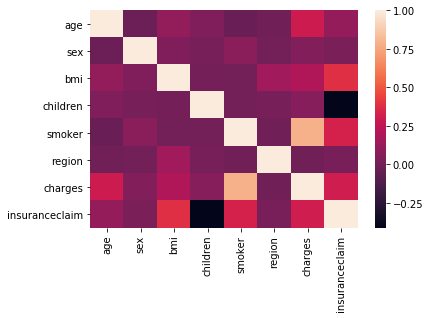

In [7]:
import seaborn as sns
#determine the correlation between variables
corr = df_insured.corr()
#creat a heatmap to visualize the correlation between variables
sns.heatmap(corr)

In [8]:
insuranceclaim = df_insured['insuranceclaim']
df_insured.drop(['insuranceclaim'], axis = 1, inplace = True)

In [9]:
#import normalizer from preprocessing package of sklearn
from sklearn.preprocessing import Normalizer
#create an instance of the object(i.e., a model estimator)
normalize = Normalizer()
normalized_insurance_data = normalize.transform(df_insured)
#view the new normalized data
normalized_insurance_data

array([[1.12526190e-03, 0.00000000e+00, 1.65235827e-03, ...,
        5.92243106e-05, 1.77672932e-04, 9.99997984e-01],
       [1.04288680e-02, 5.79381554e-04, 1.95657151e-02, ...,
        0.00000000e+00, 1.15876311e-03, 9.99753173e-01],
       [6.29259576e-03, 2.24735563e-04, 7.41627357e-03, ...,
        0.00000000e+00, 4.49471125e-04, 9.99952346e-01],
       ...,
       [1.10405699e-02, 0.00000000e+00, 2.26025000e-02, ...,
        0.00000000e+00, 1.22672999e-03, 9.99682814e-01],
       [1.04570071e-02, 0.00000000e+00, 1.28471802e-02, ...,
        0.00000000e+00, 1.49385816e-03, 9.99861675e-01],
       [2.09323914e-03, 0.00000000e+00, 9.97548554e-04, ...,
        3.43153957e-05, 3.43153957e-05, 9.99997310e-01]])

In [10]:
normalized_insurance_df = pd.DataFrame(normalized_insurance_data, columns= ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
normalized_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.001125,0.000000,0.001652,0.000000,0.000059,0.000178,0.999998
1,0.010429,0.000579,0.019566,0.000579,0.000000,0.001159,0.999753
2,0.006293,0.000225,0.007416,0.000674,0.000000,0.000449,0.999952
3,0.001501,0.000045,0.001033,0.000000,0.000000,0.000045,0.999998
4,0.008275,0.000259,0.007468,0.000000,0.000000,0.000259,0.999938


In [11]:
#add back the insurance claim column to the dataframe
normalized_insurance_df['insuranceclaim'] = insuranceclaim
normalized_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0.001125,0.000000,0.001652,0.000000,0.000059,0.000178,0.999998,1
1,0.010429,0.000579,0.019566,0.000579,0.000000,0.001159,0.999753,1
2,0.006293,0.000225,0.007416,0.000674,0.000000,0.000449,0.999952,0
3,0.001501,0.000045,0.001033,0.000000,0.000000,0.000045,0.999998,0
4,0.008275,0.000259,0.007468,0.000000,0.000000,0.000259,0.999938,1


In [12]:
target = normalized_insurance_df['insuranceclaim']
features = normalized_insurance_df.drop(['insuranceclaim'], axis = 1)

In [13]:
#Next split the data into train and test data using k cross validation
#import kfold sub package from the sklearn model selection package
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 12)
#view the shape of the splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 7), (335, 7), (1003,), (335,))

In [14]:
#create a model estimator for the logistics
logreg = LogisticRegression()
lg = logreg.fit(x_train,y_train)
#predict the insurance claim potential with the test data
y_pred = lg.predict(x_test)

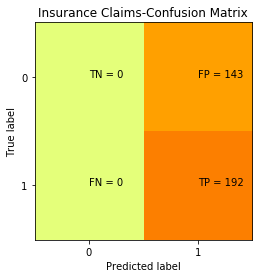

In [15]:
#compute the confusion matrix so as evaluate accuracy of our model
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = [0,1]
plt.title('Insurance Claims-Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [16]:
#checking model accuracy
accuracy = lg.score(x_test, y_test)
print(accuracy)

0.573134328358209


In [17]:
lg.coef_

array([[-0.22445664, -0.00508805,  0.023689  , -0.0458237 ,  0.00214917,
        -0.00838396,  0.17900661]])

Text(0.5, 0, 'Importance')

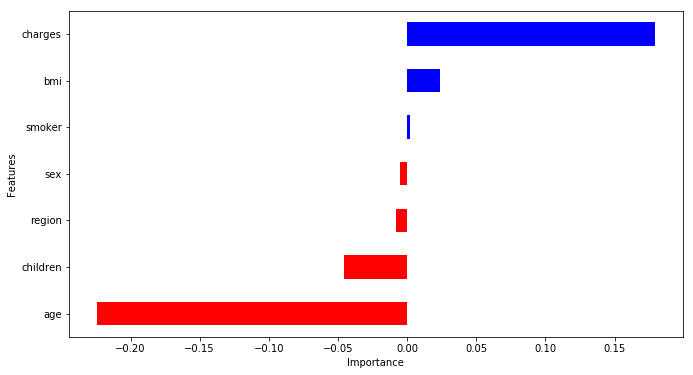

In [18]:
coeff = list(lg.coef_[0])
labels = list(normalized_insurance_df.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [19]:
#create a new copy of original dataframe
df1_insured = Insurance_costs.copy()
df1_insured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [20]:
#obtain features and target variables respectively
Target1 = df1_insured['charges']
features1 =  df1_insured.drop(['charges'], axis = 1)

In [21]:
#Next split the data into train and test data using k cross validation
#import kfold sub package from the sklearn model selection package
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features1, Target1, random_state = 12)
#view the shape of the splitted data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 7), (335, 7), (1003,), (335,))

In [22]:
#import elastic net from linear_model
from sklearn.linear_model import ElasticNet
#create an instance of the model
linreg = ElasticNet(alpha = 0.0001)

In [23]:
#fit model
lr = linreg.fit(x_train, y_train)

In [24]:
#retrieve coefficients of your features and its intercept
print(lr.coef_)
print(lr.intercept_)

[ 2.70593865e+02 -1.29766197e+01  4.04384601e+02  1.03686844e+01
  2.48061664e+04 -2.05659460e+02 -1.92872263e+03]
-13407.561839532376


In [25]:
#obtain the R square value so as to know model accuracy
accuracy1 = lr.score(x_test, y_test)
print('Accuracy score:', accuracy1)

Accuracy score: 0.6880814736579799
